In [3]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path
#sys.path.append('/anaconda3/lib/python3.6/site-packages/')
#sys.path.append('/usr/local/lib/python3.6/site-packages/')
#sys.path.append('/Users/sanjeevyadav/anaconda3/lib/python3.6/site-packages/')
#sys.path.append('/usr/local/lib/python2.7/site-packages')
#sys.path.append('/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages')
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")

In [4]:
sys.path

['',
 '/Users/sanjeevyadav/anaconda3/envs/py36/lib/python36.zip',
 '/Users/sanjeevyadav/anaconda3/envs/py36/lib/python3.6',
 '/Users/sanjeevyadav/anaconda3/envs/py36/lib/python3.6/lib-dynload',
 '/Users/sanjeevyadav/anaconda3/envs/py36/lib/python3.6/site-packages',
 '/Users/sanjeevyadav/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/extensions',
 '/Users/sanjeevyadav/.ipython',
 '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages']

In [5]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import talib

#%load_ext watermark
#%watermark -p pandas,numpy,datetime,matplotlib,pandas_datareader,fix_yahoo_finance

# 1. CCI Values

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

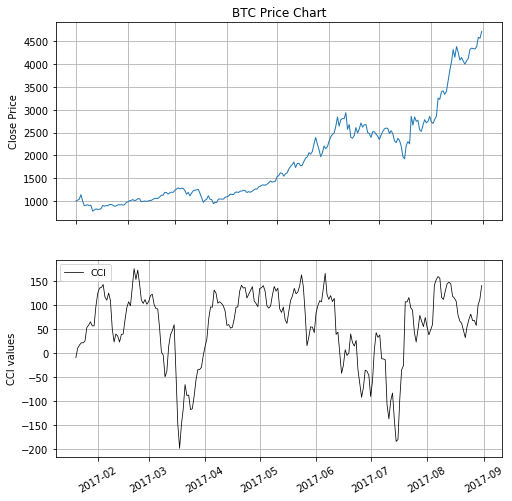

In [6]:
# Commodity Channel Index Python Code

# Load the necessary packages and modules
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import fix_yahoo_finance
import pandas as pd

# Commodity Channel Index 
def CCI(data, ndays): 
    TP = (data['High'] + data['Low'] + data['Close']) / 3 
    CCI = pd.Series((TP - TP.rolling(window=ndays).mean()) / (0.015 * TP.rolling(window=ndays).std()),
    name = 'CCI') 
    data = data.join(CCI) 
    return data

# Retrieve the data

data = pd.read_csv("btc.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close'], parse_dates=True)
data = data.iloc[::-1]

# Compute the Commodity Channel Index(CCI) based on the 20-day Moving average
n = 20
BTC_CCI = CCI(data, n)
CCI = BTC_CCI['CCI']

# Plotting the Price Series chart and the Commodity Channel index below
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('BTC Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(CCI,'k',lw=0.75,linestyle='-',label='CCI')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

High positive CCI values show that there is a strong uptrend but in the first graph it is not clear visible.

You can see that uptrend is small at start but CCI values fluctuate rapidly. It is because strength is strong relative to past 20 days. So, CCI values are higher even when the absolute uptrend is weak.

If CCI is above 100 then it is an uptrend and when CCI is below -100 then it is the start of downtrend.

# 2. MACD

The below was tested on Tesla stocks and shows correct results for MACD values:

In [11]:
# from pandas_datareader import data as pdr
# import datetime
# import fix_yahoo_finance as yf
# yf.pdr_override() 
# px = pdr.get_data_yahoo('TSLA',
# start=datetime.datetime(2018, 1, 1),
# end=datetime.datetime(2018, 3, 29))
# px['26 ema'] = pd.ewma(px['Close'], span=26)
# px['12 ema'] = pd.ewma(px['Close'], span=12)
# px['9 ema'] = pd.ewma(px['Close'], span=9)

# px['MACD'] = (px['12 ema'] - px['26 ema'])

# px['9 period MACD'] = pd.ewma(px['MACD'], span=9)



# px['diff'] = px['MACD'] - px['9 period MACD']
# px.plot(y=['MACD', '9 period MACD'], title='TSLA')
# px.plot(y=['diff'], kind='bar');

Plotting MACD values for our data:

In [12]:
df = pd.read_csv("btc.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close'], parse_dates=True).iloc[::-1]

In [13]:
df.head()

,Open,High,Low,Close
2017-01-01,966.6,1006.5,961.3,999.0
2017-01-02,999.2,1034.8,997.3,1019.3
2017-01-03,1019.3,1038.7,1013.5,1037.5
2017-01-04,1037.5,1150.0,1036.4,1139.6
2017-01-05,1139.8,1166.0,865.4,1003.2


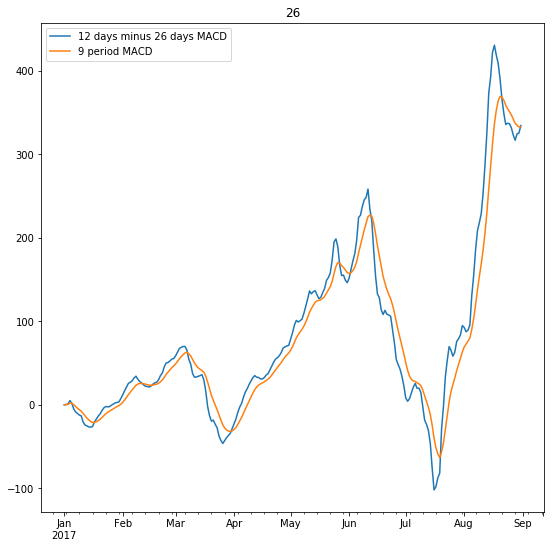

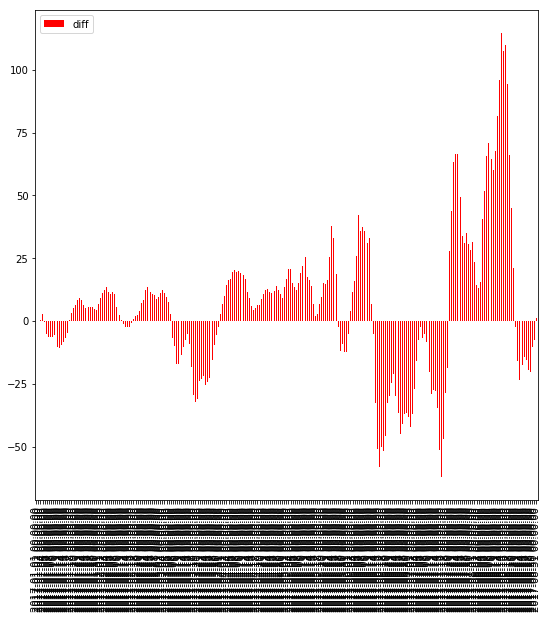

In [14]:
df['26 ema'] = pd.ewma(df['Close'], span=26)
df['12 ema'] = pd.ewma(df['Close'], span=12)
df['9 ema'] = pd.ewma(df['Close'], span=9)

df['12 days minus 26 days MACD'] = (df['12 ema'] - df['26 ema'])

df['9 period MACD'] = pd.ewma(df['12 days minus 26 days MACD'], span=9)



df['diff'] = df['12 days minus 26 days MACD'] - df['9 period MACD']
df.plot(y=['12 days minus 26 days MACD', '9 period MACD'], title='26', figsize=(9,9))
df.plot(y=['diff'],kind='bar', color='r', figsize=(9,9));



I am trying to remove the tickers on x-axis in second graph. 
The two graphs show that when blue line is higher then red bar is positive, which shows an uptrend.

The height of red bar can be used to indicate the strength of uptrend and downtrend. Around August, blue line is constantly above orange line so height of red bar in positive and increasing, which means a strong uptrend.

# 3. Bollinger Bands

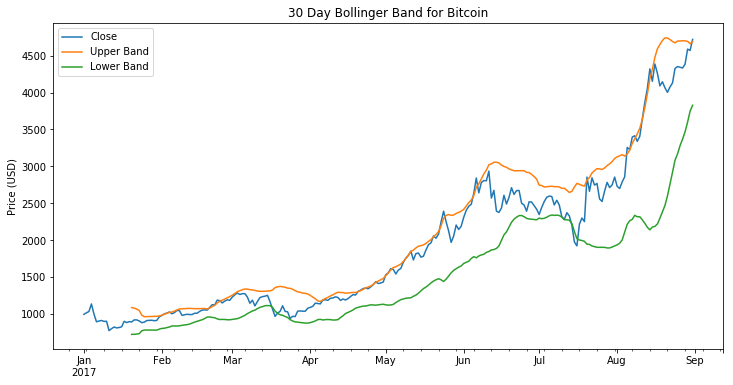

In [15]:
# import needed libraries
from pandas_datareader import data as web

df['30 Day MA'] = df['Close'].rolling(window=20).mean()
df['30 Day STD'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['30 Day MA'] + (df['30 Day STD'] * 2)
df['Lower Band'] = df['30 Day MA'] - (df['30 Day STD'] * 2)

# Simple 30 Day Bollinger Band for btc data
#df[['Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))

df[['Close', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('30 Day Bollinger Band for Bitcoin')
plt.ylabel('Price (USD)')
plt.show();

This graph shows that that when blue line is near upper band then it is an uptrend and when it is near lower band then it is downtrend.

When blue line crosses the upper bound then it is sell signal and when blue line is below lower band then it is buy signal.

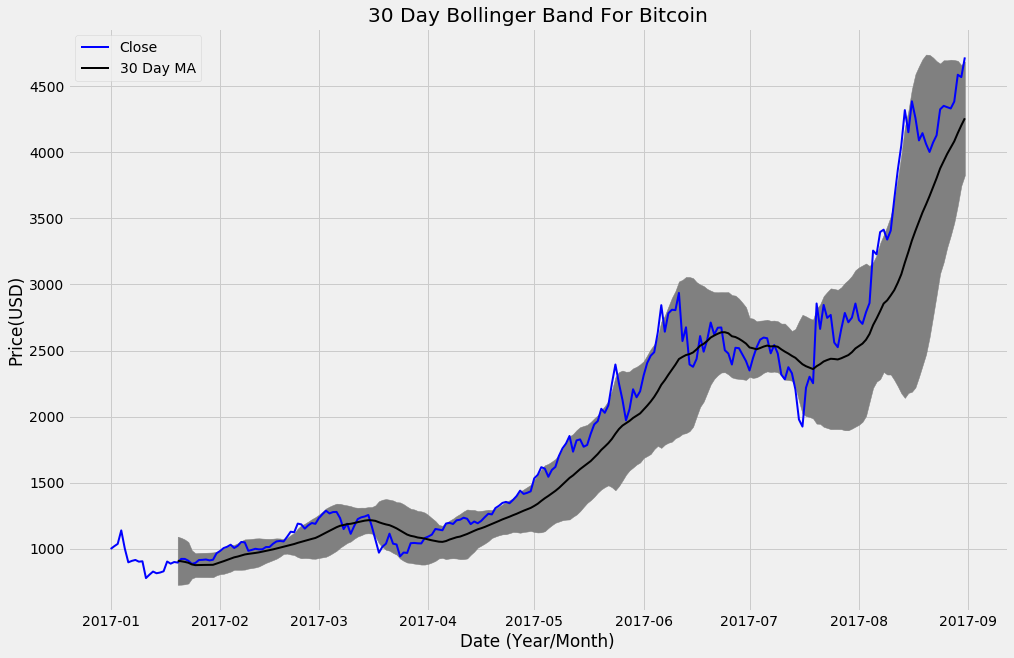

In [16]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

# Get index values for the X axis for Bitcoin data
x_axis = df.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Bitcoin
ax.fill_between(x_axis, df['Upper Band'], df['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, df['Close'], color='blue', lw=2)
ax.plot(x_axis, df['30 Day MA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Bitcoin')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();

This graph also shows the same result as the previous one. In this graph the region between upper and lower band is greyed.

In this graph, when blue line is below the grey region then it is buy signal and when it is above grey region then it is sell signal.

# 4. Candlestick OHLC

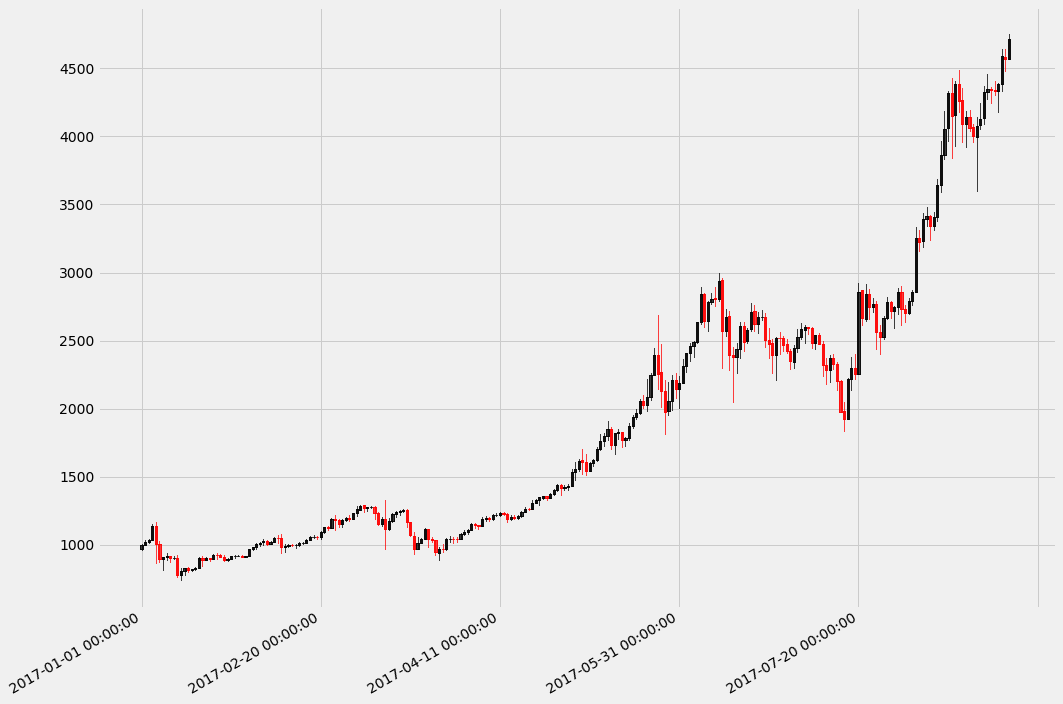

In [21]:
from matplotlib import style
import mpl_finance
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker
import datetime as datetime
import numpy as np

#quotes = np.array(...)
quotes=pd.read_csv("btc.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close'], parse_dates=True).iloc[::-1]

fig, ax = plt.subplots(figsize=(15,10))
candlestick2_ohlc(ax,quotes['Open'],quotes['High'],quotes['Low'],quotes['Close'],width=0.6)

xdate = df.index

ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

fig.autofmt_xdate()
fig.tight_layout()

plt.show()

Black shows that opening price is lower than closing price on that day, and red shows that opening price is higher than closing price on that day.

# Improvement

In further modification 

- we will try to plot the two graphs of MACD in a single figure.

- In candlestick chart we will try to draw horizontal line for support and resistance to detect new trends. Till now, Bollinger bands are showing new trends correctly.
